# **How to identify errors in data collection**



##**Introduction**

Detecting errors is crucial to ensure the quality and reliability of your data, which directly impacts the effectiveness of any AI or ML model built on that data. This reading provides a detailed walkthrough of identifying common data collection errors. By following this guide, you will gain a better understanding of the techniques and tools used to detect and correct these errors.

In [21]:
import os
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

##**Step 1: Understand the dataset**

Before identifying errors, it’s important to first understand the dataset you’re working with. This involves examining the data structure, types of data fields, and any known characteristics of the data. This step helps you to become familiar with the dataset by viewing a sample of the data and understanding the data types of each column. This initial inspection sets the stage for identifying potential issues in the data.

In [10]:
# Download the dataset from Kaggle
data_path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")
df = pd.read_csv(os.path.join(data_path, "netflix_titles.csv"))

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


##**Step 2: Identify missing values**

Missing values are a common issue in data collection that can skew results if not handled properly.

Here I am using `isnull().sum()` function which provides a quick count of missing values in each column. Columns with a significant number of missing values may require further investigation to determine the cause of these gaps.

In [20]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
director,2634
cast,825
country,831
date_added,10
rating,4
duration,3


## **Step 3: Detect outliers**

Outliers can indicate errors in data collection, particularly if they deviate significantly from expected values. In that case, we can use descriptive statistics and visualization to detect outliers. Descriptive statistics such as the **mean and standard deviation**, along with visual tools such as **box plots**, help to identify outliers. **Z-scores** quantify how far a data point is from the mean, with a Z-score greater than 3 typically considered an outlier.


In [24]:
# Use descriptive statistics to identify potential outliers
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


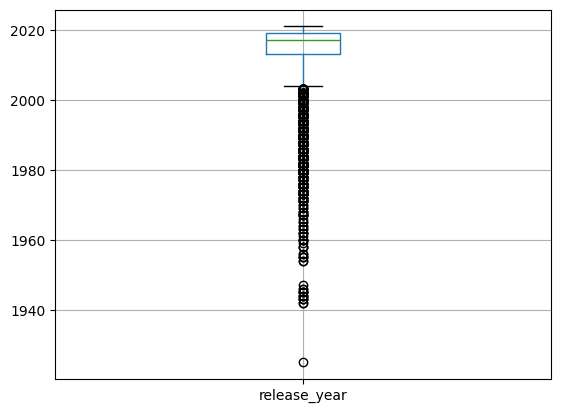

In [35]:
# Visualize data to spot outliers using box plots
df.boxplot(column=['release_year'])
plt.show()

With the Boxplot, you may not see very infromative result. Therefore, we use Z-score.

In [36]:
# Calculate Z-scores to identify outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Find rows with Z-scores greater than 3
outliers = (z_scores > 3).all(axis=1)
print(df[outliers].shape)

(217, 12)


## **Step 4: Identify data entry errors**

Data entry errors, such as incorrect values or inconsistent formatting, can be subtle but impactful. Here are some ways to check if there is any entry errors:

By examining the unique values and frequency distributions in categorical columns, you can identify inconsistencies, such as misspellings or unexpected categories. For numeric data, you can look for impossible or implausible values that may indicate data entry errors.

In [41]:
# Check for unique values in categorical columns to identify inconsistencies
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [42]:
# Use value counts to identify unusual or erroneous entries
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [43]:
# Check numeric columns for impossible values.
print(df[df['release_year'] < 0])

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


## **Step 5: Validate data consistency**

Consistency checks help to ensure that your data behaves as expected over time or across different variables. Cross-validation between related columns can identify inconsistencies, such as mismatched totals. Additionally, checking for duplicate rows helps to identify errors where the same data has been entered multiple times.

In [44]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


## **Conclusion**

Identifying and addressing errors in data collection is a critical step in preparing high-quality datasets for analysis and ML. This walkthrough provided a comprehensive guide to detecting and correcting common data collection errors, including missing values, outliers, data entry errors, and inconsistencies.

By applying these techniques, you can significantly improve the reliability and accuracy of your data, leading to better outcomes in your AI and ML projects. As you continue to work with data, these skills will help you maintain the integrity of your datasets, ensuring that your models are built on a solid foundation of clean, accurate data.

